# An annotation tool for image pairs

The goal is to generate pairs of images which will be annotated either as "same"=1 or "different"=0.

### Use cases:
Face recognition: training a siamese network to recognize if the same person shows up in two images
Character recognition

### Input:
The paths to the images are stored in a text file

### Output:
Save the annotation in a parquet file with three columns: base_im, pair_im, label.

In [1]:
import ipywidgets as widgets
from IPython.display import clear_output, display
import random
from PIL import Image
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd

In [17]:
IMAGES_PATH = Path("images")
path_list = [str(pth) for pth in IMAGES_PATH.glob("*.jpg")]
path_list[0:2]

['images\\im1.jpg', 'images\\im2.jpg']

In [18]:
# 1. First, define the data structure for storing the results

annotations_dict = {
    "base_im":[],
    "pair_im":[],
    "label":[]
    }

In [20]:
# 2. Define the way in which the image pairs are generated (randomly sample two paths from the list)

def generate_img_pair(input: list, k: int=2) -> tuple:
    # sample k image paths without replacement
    samples = random.sample(input, k)
    base_img_path = samples[0]
    pair_img_path = samples[1]

    assert base_img_path != pair_img_path

    return (base_img_path, pair_img_path)

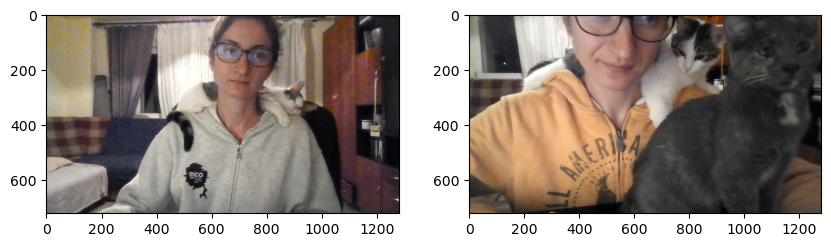

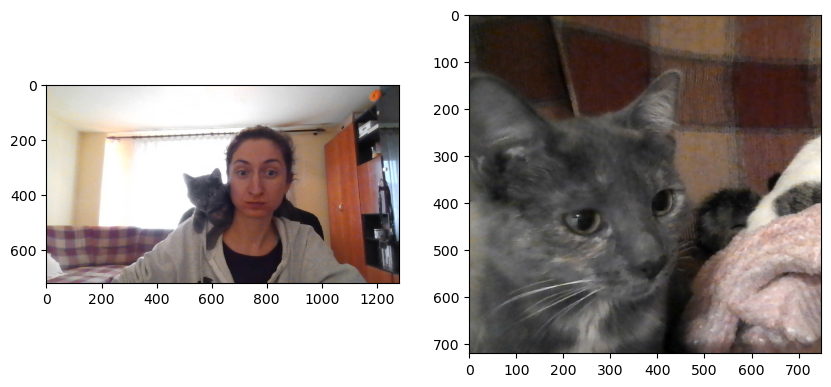

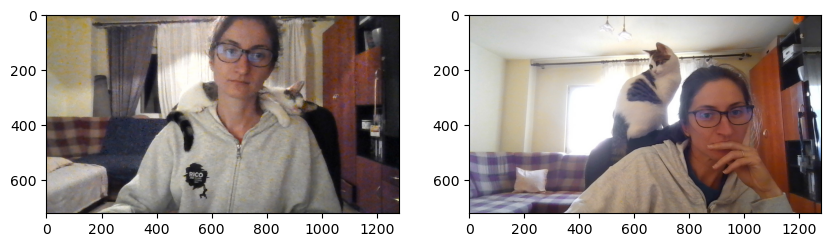

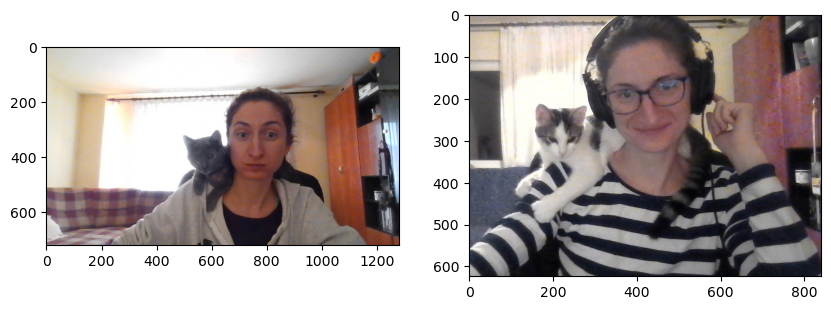

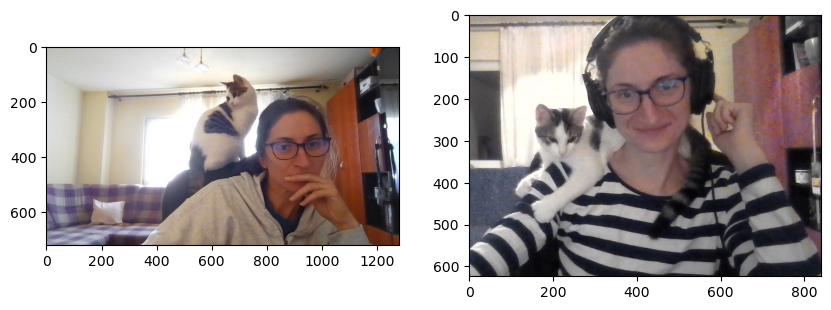

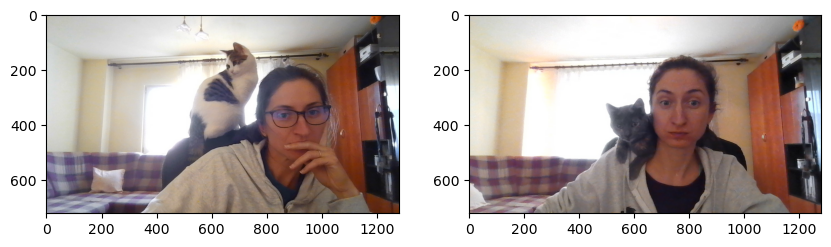

In [21]:
generate_btn = widgets.Button(description = "GENERATE")
same_btn = widgets.Button(description = "Same")
different_btn = widgets.Button(description = "Different")

In [22]:
display(generate_btn)
display(same_btn)
display(different_btn)
# At this point, the buttons are visible, but they carry no functionality or logic behind them. 
# Clicking on "GENERATE" should display a pair of images the user can assess as either "same" or "different". Let's implement this.

Button(description='GENERATE', style=ButtonStyle())

Button(description='Same', style=ButtonStyle())

Button(description='Different', style=ButtonStyle())

In [23]:
display_plot = widgets.Output()

def generate_eventHandler(p):
    generate_btn.image_paths = generate_img_pair(input = path_list)
    images = (Image.open(generate_btn.image_paths[0]), Image.open(generate_btn.image_paths[1]))

    with display_plot:
        clear_output()
        fig, ax = plt.subplots(ncols = 2, figsize = (10, 8))
        ax[0].imshow(images[0])
        ax[1].imshow(images[1])
        display(fig.figure)
generate_btn.on_click(generate_eventHandler)

In [24]:
display(generate_btn)

# Add the widget to display the output of the GENERATE button.
display(display_plot)

display(same_btn)
display(different_btn)

Button(description='GENERATE', style=ButtonStyle())

Output()

Button(description='Same', style=ButtonStyle())

Button(description='Different', style=ButtonStyle())

Ta-daaaa! There are the image pairs, ready to be annotated.

The next step is to add the logic to the annotation buttons. Clicking on any of the buttons should label the image pair and append the label, together with the image names, to the results dictionary. This will then overwrite the parquet file where we store the annotations.

In [25]:
def same_eventHandler(s):
    annotations_dict["base_im"].append(generate_btn.image_paths[0])
    annotations_dict["pair_im"].append(generate_btn.image_paths[1])
    annotations_dict["label"].append(1)

def different_eventHandler(s):
    annotations_dict["base_im"].append(generate_btn.image_paths[0])
    annotations_dict["pair_im"].append(generate_btn.image_paths[1])
    annotations_dict["label"].append(0)

same_btn.on_click(same_eventHandler)
different_btn.on_click(different_eventHandler)

In [26]:
display(generate_btn)

# Add the widget to display the output of the GENERATE button.
display(display_plot)

display(same_btn)
display(different_btn)

Button(description='GENERATE', style=ButtonStyle())

Output()

Button(description='Same', style=ButtonStyle())

Button(description='Different', style=ButtonStyle())

In [28]:
# Check the annotations in the results dictionary
ann_df = pd.DataFrame(annotations_dict)
ann_df
# Save it to a parquet file
ann_df.to_parquet("annotations.parquet.gzip")

# Read the parquet file
# df = pd.read_parquet("annotations.parquet.gzip")

,base_im,pair_im,label
0,images\im2.jpg,images\im6.jpg,1
1,images\im5.jpg,images\im8.jpg,1
2,images\im2.jpg,images\im4.jpg,1
3,images\im5.jpg,images\im1.jpg,0
4,images\im4.jpg,images\im1.jpg,1
5,images\im4.jpg,images\im5.jpg,0
